<div style='text-align: center;'>
<img src="../images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Workbook - Week 4

Now we have a random number generator we can sample from the available probility distributions. The most common used in finance would be:
- `normal` the normal distribution $x\sim N(\mu,\sigma^2)$ with mean $\mu$ and variance $\sigma^2$
- `uniform` the uniform distribution $x\sim U(a,b)$ over the interval $[a,b]$ can be used to calculate if an event happens according to some known probability
- `exponential` the exponential distribution $x\sim$ Exp $(\lambda)$ with rate parameter $\lambda$ to generate the waiting time of a Poisson distribution with mean $\lambda$

# Tasks

1. Generate 1000 numbers from each of the distributions, and plot out a histogram of the frequency distribution

In [1]:
import matplotlib.pyplot as plt
import numpy
rng = numpy.random.default_rng(seed=0) # create a random number generator and reset the starting value

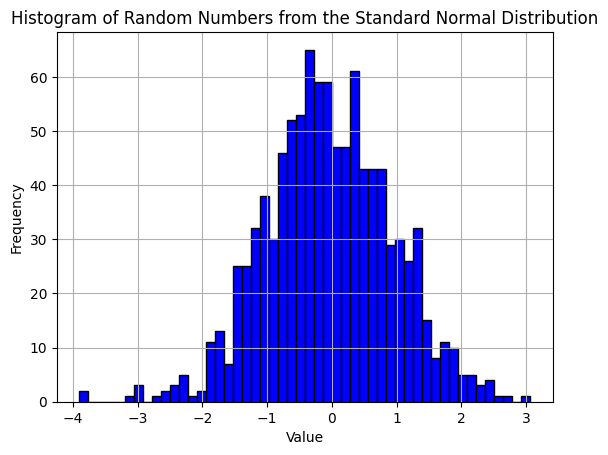

In [2]:
xi_normal = rng.normal(0.0,1.0,size=(1000))
plt.hist(xi_normal, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Random Numbers from the Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

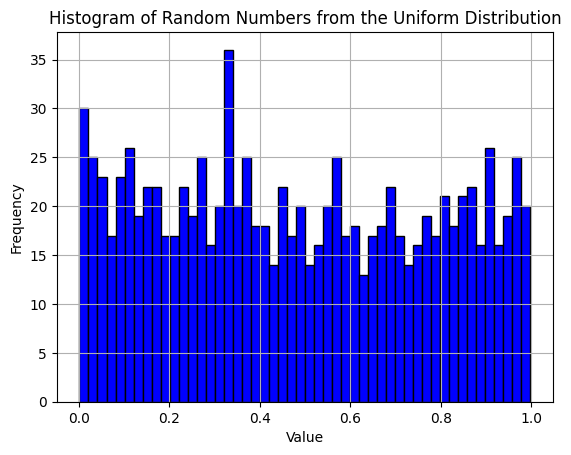

In [3]:
xi_uniform = rng.uniform(0.0,1.0,size=(1000))
plt.hist(xi_uniform, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Random Numbers from the Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

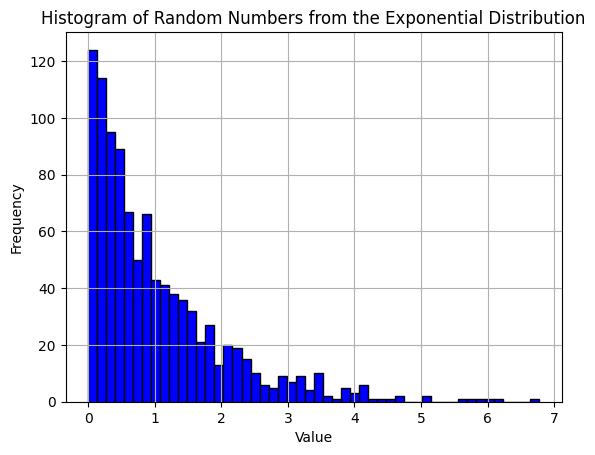

In [4]:
xi_exp = rng.exponential(1.0,size=(1000))
plt.hist(xi_exp, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Random Numbers from the Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

2. Regenerate the graphs with $n=10,000$ $n=100,000$ $n=1,000,000$ numbers from the distribution, what do you notice happens?

Should see that the distribution approaches the continuous pdf function of the theoretical limit. For instance the pdf of an exponential distribution is given by 
$$
 e^{-\lambda x}
$$

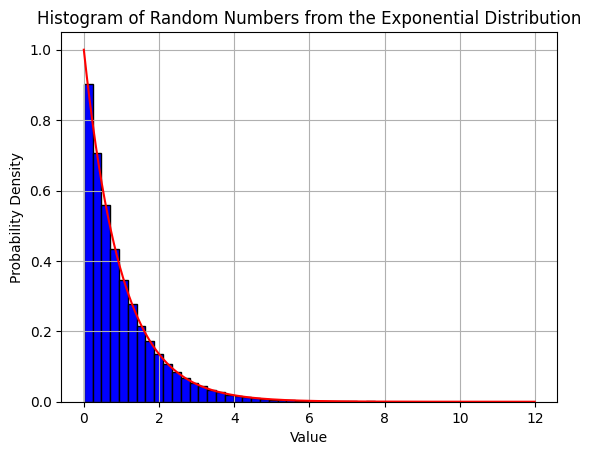

In [5]:
xi_exp = rng.exponential(1.0,size=(100000))
x = numpy.arange(0,12,0.01)
pdf = numpy.exp(-x)
plt.hist(xi_exp, bins=50, color='blue', edgecolor='black',density=True)
plt.plot(x,pdf,color='red')
plt.title('Histogram of Random Numbers from the Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

Assume $x \sim N(0,1)$ is a random draw from the normal distribution, the random variable $F=f(x)$, and the function $f(x)$ is given by
$$
f(x) = \begin{cases}
x^2 & \text{ if } x \leq 1 \\
0 & \text{ if } x > 1
\end{cases}.
$$

3. Use Monte Carlo simulations, can you calculate the expectation $V=\text{E}[F]$?

In [6]:
def monteCarloValue(N):
    x = rng.normal(0.0,1.0,size=(N))

    sum = 0.0
    for n in range(0,N):
        Fn = 0.0
        if x[n] < 1.0:
            Fn = x[n]*x[n]
        sum = sum + Fn
    return sum / N 

N=10
print( "Result with",N,"paths is:=",monteCarloValue(N))

Result with 10 paths is:= 0.7307095609307759


4. Change the value of `numberOfResults` to 20, 40, 80 and more. What properties can you identify in the graphs? Be careful, as $N$ gets large so do the computation times!

Result with 1000 paths is:= 0.6197819429238408
Result with 2000 paths is:= 0.5946444759207464
Result with 3000 paths is:= 0.6026708504201155
Result with 4000 paths is:= 0.5873313320759327
Result with 5000 paths is:= 0.6086300493308442
Result with 6000 paths is:= 0.6189166284540436
Result with 7000 paths is:= 0.5998372719949305
Result with 8000 paths is:= 0.5970262112857215
Result with 9000 paths is:= 0.6024858180782374
Result with 10000 paths is:= 0.6074216881360468
Result with 11000 paths is:= 0.6121913342109867
Result with 12000 paths is:= 0.5903827159943105
Result with 13000 paths is:= 0.597188355670072
Result with 14000 paths is:= 0.5944069851558903
Result with 15000 paths is:= 0.6112293069407783
Result with 16000 paths is:= 0.5837718280824336
Result with 17000 paths is:= 0.6059329764378514
Result with 18000 paths is:= 0.5951877839793245
Result with 19000 paths is:= 0.6018740917325102
Result with 20000 paths is:= 0.6135461442287263
Result with 21000 paths is:= 0.5826097145692472
Re

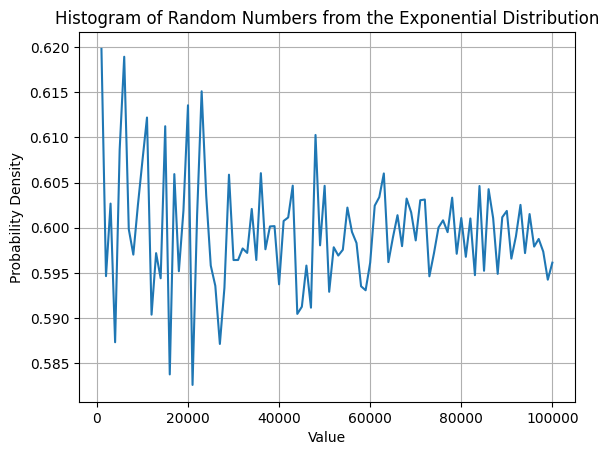

In [7]:
results = 100
Narray = numpy.zeros(results)
Varray = numpy.zeros(results)

for k in range(0,results):
    N=1000 + k*1000
    Narray[k]=N
    val = monteCarloValue(N)
    Varray[k]=val 
    print( "Result with",N,"paths is:=",val)

plt.plot(Narray,Varray)
plt.title('Histogram of Random Numbers from the Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)

Results look like *white noise*. They appear to be converging slowly towards the mean, in that the variance of the results is reducing as $N$ gets larger. We can also see that the mean of the estimator is always the same independent of $N$.

5. Calculate the value using numerical quadrature:-
$$
V = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^1 x^2 e^{-x^2/2} dx
$$
and use it to check the accuracy of your code. Do the results match?


In [8]:
from scipy.integrate import quad as QUAD

integrand = lambda x: x*x * numpy.exp(-x*x/2.) / numpy.sqrt(2*numpy.pi)

I = QUAD(integrand , -15., 1)
print(" V_exact:=",I[0]," with error ",I[1])

 V_exact:= 0.5993740215493997  with error  1.0132102361976036e-10


Yes numbers look to match, $V_\text{exact}$ would be in the centre of the distribution of results above.

6. How can you definitively say what the error is, given that for any value of $N$ you generate a random result every time? _Hint: think about the variance of your result._


Yes we can get the variance of the results. Consider our estimator with $N=1000$ paths, we can generate a distribution of the results:

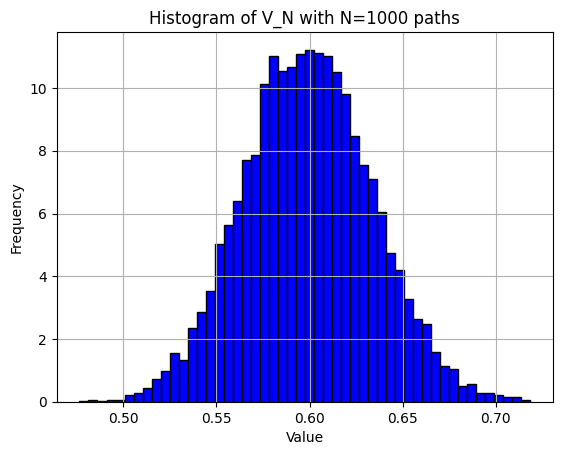

In [9]:
results = 10000
Varray = numpy.zeros(results)

for k in range(0,results):
    N=1000
    Varray[k] = monteCarloValue(N)
    
plt.hist(Varray, bins=50, color='blue', edgecolor='black',density=True)
plt.title('Histogram of V_N with N=1000 paths')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This looks like a normal distribution, and according to the central limit theorem it should be! Calculate the variance of the distribution and it will give us a confidence interval for $V_N$. In the labs next week we discover how to estimate the variance of $V_N$ using the value we get on each path, rather than running $V_N$ a number of times.


In [10]:

variance_V_N = numpy.var(Varray)
mu_V_N = numpy.average(Varray)


Now let's check if the plot above looks like a normal distribution with mean and variance as calculated here...

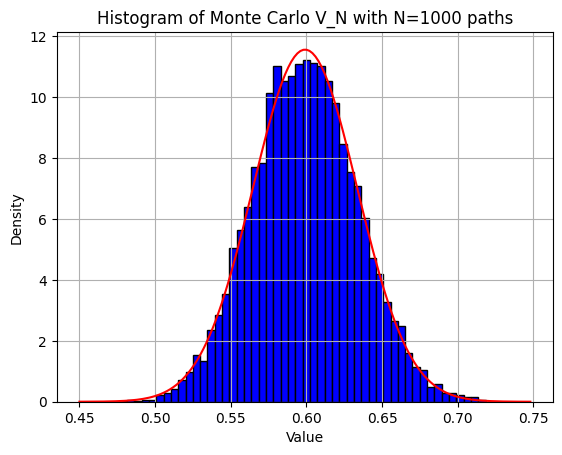

In [11]:

x = numpy.arange(0.45,0.75,0.002)
pdf = []
for xi in x:
    pdf.append( (1.0/(numpy.sqrt(2.*numpy.pi*variance_V_N)))*numpy.exp( - (xi - mu_V_N)*(xi - mu_V_N)/(2*variance_V_N) ) )

plt.hist(Varray, bins=50, color='blue', edgecolor='black',density=True)
plt.plot(x,pdf,color='red')
plt.title('Histogram of Monte Carlo V_N with N=1000 paths')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

7. How efficient is your code? Test different random number generators to see which one is best. For the more confident student, you might also investigate ways to speed up the calculations using the `numba` or `cython` libraries.

Left as an exercise.